In [1]:
from lagrangian_trajectory_clustering.data_loading import (
    load_cape_verde_trajectories,
    load_labsea_trajectories,
    subset_trajectories,
)

In [2]:
# df = subset_trajectories(load_cape_verde_trajectories(year=2010), num_traj=1_000)
df = subset_trajectories(load_labsea_trajectories(), num_traj=1_000)
df

latitude  longitude                 time
traj obs                                           
0    0    60.066532 -42.860935  1990-01-03 12:00:00
     1    62.243374 -41.847748  1989-12-29 12:00:00
     2    64.423485 -39.589207  1989-12-24 12:00:00
     3    65.065970 -37.968430  1989-12-19 12:00:00
     4    64.880410 -36.790250  1989-12-14 12:00:00
...             ...        ...                  ...
999  726  57.076344 -49.796390  1980-01-26 12:00:00
     727  56.995384 -49.594067  1980-01-21 12:00:00
     728  57.009872 -49.381340  1980-01-16 12:00:00
     729  57.131140 -49.206596  1980-01-11 12:00:00
     730  57.230263 -48.709133  1980-01-06 12:00:00

[731000 rows x 3 columns]

In [3]:
from lagrangian_trajectory_clustering.trafo.grid import (
    geo_df_to_grid_series,
    grid_series_to_geo_df,
)

In [4]:
from lagrangian_trajectory_clustering.trafo.sequence import (
    remove_subsequent_identical_elements,
    series_sequences_to_multi_index_series,
    multi_index_series_to_series_sequences,
)

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


CPU times: user 1.53 s, sys: 51.9 ms, total: 1.59 s
Wall time: 1.59 s


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

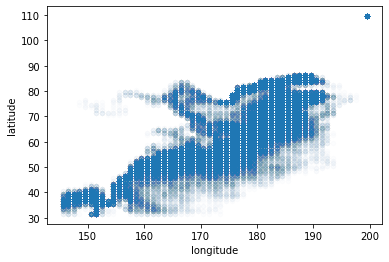

In [5]:
%%time

grid_series_to_geo_df(
    series_sequences_to_multi_index_series(
        remove_subsequent_identical_elements(
            multi_index_series_to_series_sequences(
                geo_df_to_grid_series(
                    df, lon_num=200, lat_num=200,
                )
            )
        ) 
    )
).plot.scatter(x="longitude", y="latitude", alpha=0.01)

In [6]:
x_axis_extent = df.longitude.min() - 10, df.longitude.max() + 10
y_axis_extent = df.latitude.min() - 10, df.latitude.max() + 10

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

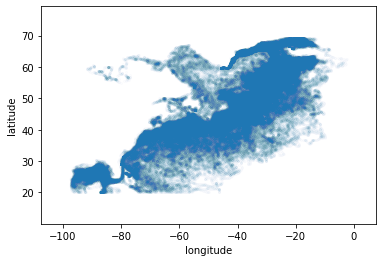

In [7]:
df.plot.scatter(x="longitude", y="latitude", s=5, alpha=0.01, xlim=x_axis_extent, ylim=y_axis_extent)

/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/conda/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)
/opt/con

CPU times: user 7.39 s, sys: 959 ms, total: 8.35 s
Wall time: 7.28 s


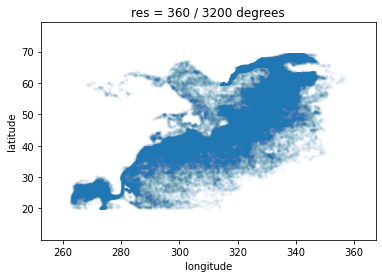

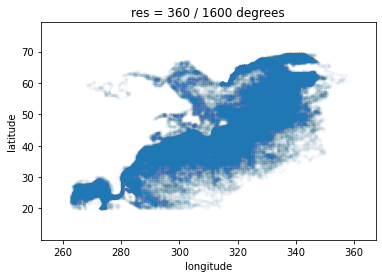

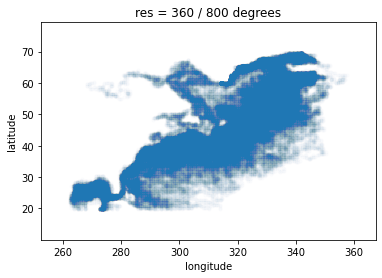

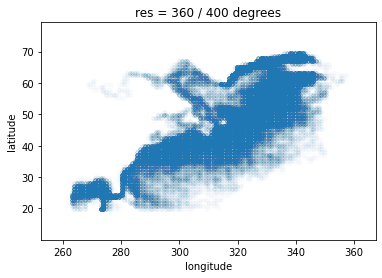

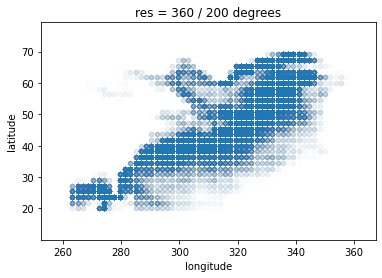

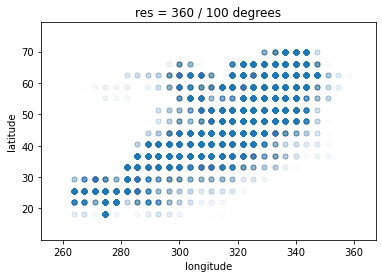

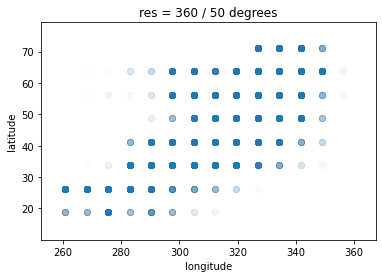

In [8]:
%%time

for n in [1_600, 800, 400, 200, 100, 50, 25]:
    ax = grid_series_to_geo_df(
        series_sequences_to_multi_index_series(
            remove_subsequent_identical_elements(
                multi_index_series_to_series_sequences(
                    geo_df_to_grid_series(
                        df, lon_num=2 * n, lat_num=n,
                    )
                )
            ) 
        ),
        lon_num=2 * n,
        lat_num=n,
    ).plot.scatter(
        x="longitude", y="latitude", s=5 / (n/1_600) **0.5, alpha=0.01, title=f"res = 360 / {2 * n} degrees",
        # xlim=x_axis_extent, ylim=y_axis_extent,
    )
    ax.set_xlim(x_axis_extent[0] + 360, x_axis_extent[1] + 360)
    ax.set_ylim(y_axis_extent[0], y_axis_extent[1])

In [9]:
from lagrangian_trajectory_clustering.trafo.sequence import fill_in_segments

In [13]:
from matplotlib import pyplot as plt

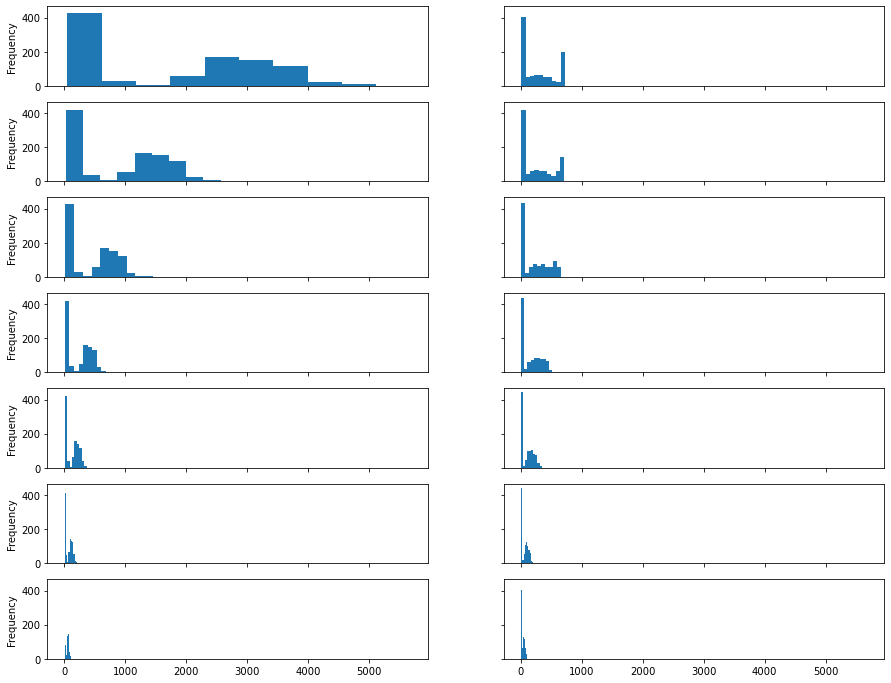

In [19]:
fig, ax = plt.subplots(7, 2, sharex=True, sharey=True, figsize=(15, 12))

for ngrid, nax in zip([1_600, 800, 400, 200, 100, 50, 25], range(7)):
    fill_in_segments(
        remove_subsequent_identical_elements(
            multi_index_series_to_series_sequences(
                geo_df_to_grid_series(
                    df, lon_num=2 * ngrid, lat_num=ngrid,
                )
            )
        ) 
    ).apply(len).plot.hist(ax=ax[nax, 0], label=str(ngrid))

for ngrid, nax in zip([1_600, 800, 400, 200, 100, 50, 25], range(7)):
    (
        remove_subsequent_identical_elements(
            multi_index_series_to_series_sequences(
                geo_df_to_grid_series(
                    df, lon_num=2 * ngrid, lat_num=ngrid,
                )
            )
        ) 
    ).apply(len).plot.hist(ax=ax[nax, 1], label=str(ngrid))